<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/LR_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Linear Regression model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [ ]:
#Load the Data
df=pd.read_csv('/content/NFLX.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,90.714287,90.815712,88.995712,89.604286,89.604286,11148900
1,2015-06-09,89.334290,92.714287,89.334290,92.449997,92.449997,22024800
2,2015-06-10,93.395714,98.970001,93.225716,95.871429,95.871429,57121400
3,2015-06-11,96.889999,96.918571,94.087143,95.094284,95.094284,26623100
4,2015-06-12,94.915710,95.342857,94.124283,94.418571,94.418571,10278800
...,...,...,...,...,...,...,...
1505,2021-05-28,504.399994,511.760010,502.529999,502.809998,502.809998,2910300
1506,2021-06-01,504.010010,505.410004,497.739990,499.079987,499.079987,2482600
1507,2021-06-02,499.820007,503.220001,495.820007,499.239990,499.239990,2269000
1508,2021-06-03,495.190002,496.660004,487.250000,489.429993,489.429993,3887400


In [ ]:
df.shape

(1510, 7)

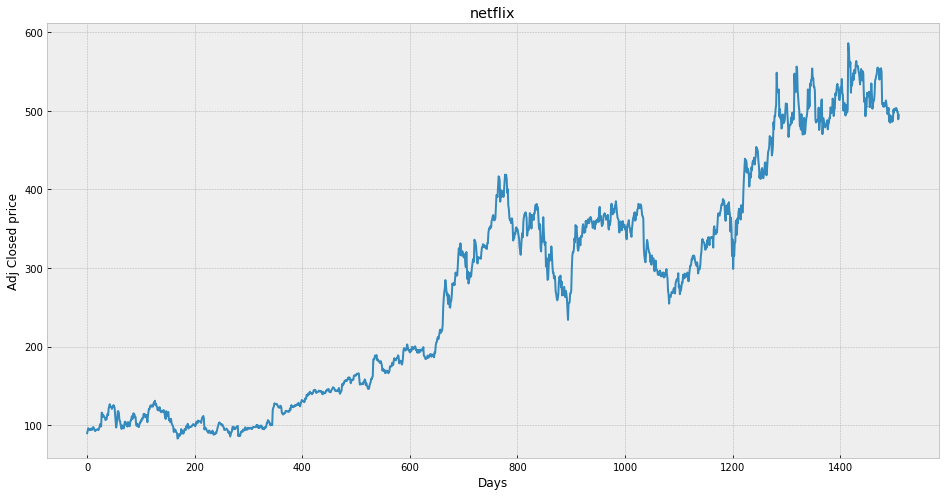

In [ ]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('netflix')
plt.xlabel('Days')
plt.ylabel('Adj Closed price')
plt.plot(df['Adj Close'])
plt.show()

In [ ]:
df=df[['Adj Close']]
df

,Adj Close
0,89.604286
1,92.449997
2,95.871429
3,95.094284
4,94.418571
...,...
1505,502.809998
1506,499.079987
1507,499.239990
1508,489.429993


In [ ]:
#Create a variable to create 'x days out in the future
future_days=30
#Create a new column shifted x units
df['Prediction']=df[['Adj Close']].shift(-future_days)
df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Adj Close,Prediction
0,89.604286,112.510002
1,92.449997,111.500000
2,95.871429,110.099998
3,95.094284,109.339996
4,94.418571,106.430000
...,...,...
1505,502.809998,NaN
1506,499.079987,NaN
1507,499.239990,NaN
1508,489.429993,NaN


In [ ]:
#Create the feature data set(X) and covert to it to a numpy array and remove last x days.
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 89.604286]
 [ 92.449997]
 [ 95.871429]
 ...
 [549.570007]
 [508.899994]
 [508.779999]]


In [ ]:
#Create the target data st
y=np.array(df['Prediction'])[:-future_days]
print(y)

[112.510002 111.5      110.099998 ... 499.23999  489.429993 494.73999 ]


In [ ]:
#Split data in 75% train and 25% test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
#create the models

#create the linear Regressor model
lr=LinearRegression().fit(x_train,y_train)

In [ ]:
#get the last x rows of feature dataset
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future


array([[523.059998],
       [518.02002 ],
       [520.25    ],
       [524.030029],
       [524.440002],
       [504.790009],
       [512.179993],
       [523.109985],
       [535.090027],
       [520.809998],
       [502.859985],
       [508.049988],
       [513.950012],
       [513.390015],
       [521.659973],
       [539.419983],
       [540.669983],
       [544.530029],
       [546.98999 ],
       [554.580017],
       [555.309998],
       [552.780029],
       [553.72998 ],
       [540.02002 ],
       [549.219971],
       [546.539978],
       [554.440002],
       [549.570007],
       [508.899994],
       [508.779999]])

In [ ]:

#Show the model linear regression  prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)
print()


[524.72467841 519.8014292  521.97976158 525.67224293 526.07272072
 506.87783288 514.09666059 524.77350768 536.47608501 522.52678971
 504.99250934 510.06230889 515.82568493 515.27865779 523.3570788
 540.70575674 541.92680602 545.69745113 548.10043802 555.51467562
 556.22774984 553.75637638 554.68432597 541.29189654 550.27877137
 547.66084855 555.37790345 550.62070034 510.89262826 510.77541241]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


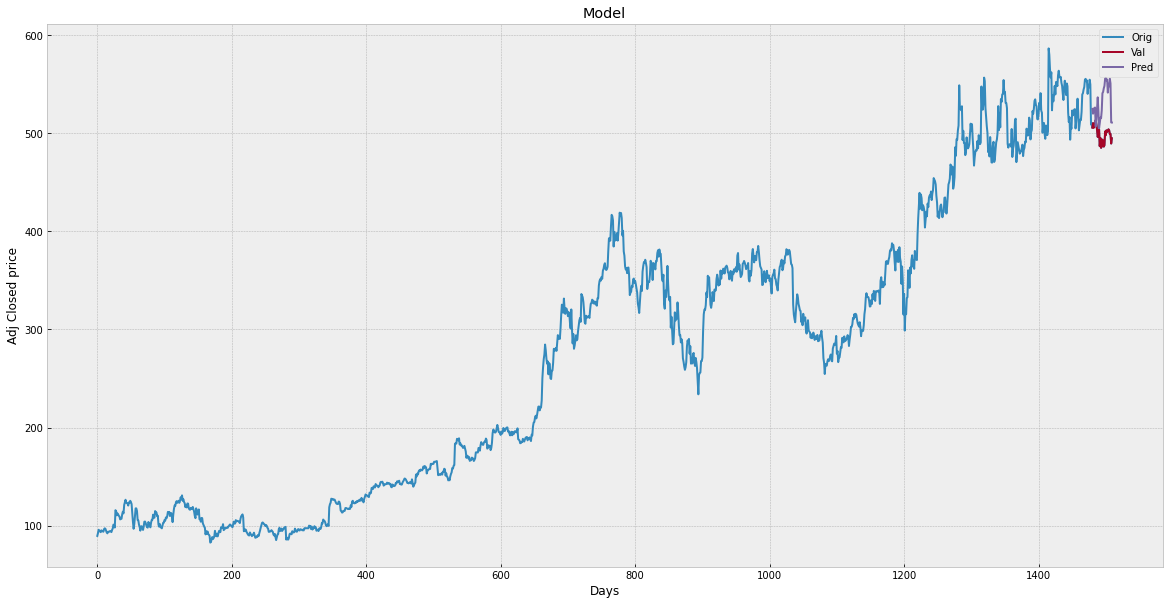

In [ ]:
#Visulaize
predictions=lr_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Closed price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()